In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Goal 1: to approximate the value of π using the "Monte Carlo" method
## steps:
.1 generate many random points within an origin centered square containing the unit circle.

.2 Count how many of said points are within the unit circle.

.3 For large numbers of points, the ratio between the points inside the unit circle and the amount of points should approach π/4. (circle area over the square area)

.4 extract π by multiplying the ratio by the area of the square

Measurements:
- compare error to the np.pi constant for different n


In [2]:
# Function to generate data by seed
def generate_samples(k,square_edge_len =2):
  points = square_edge_len*np.random.rand(k,2) -(square_edge_len/2)
  return points

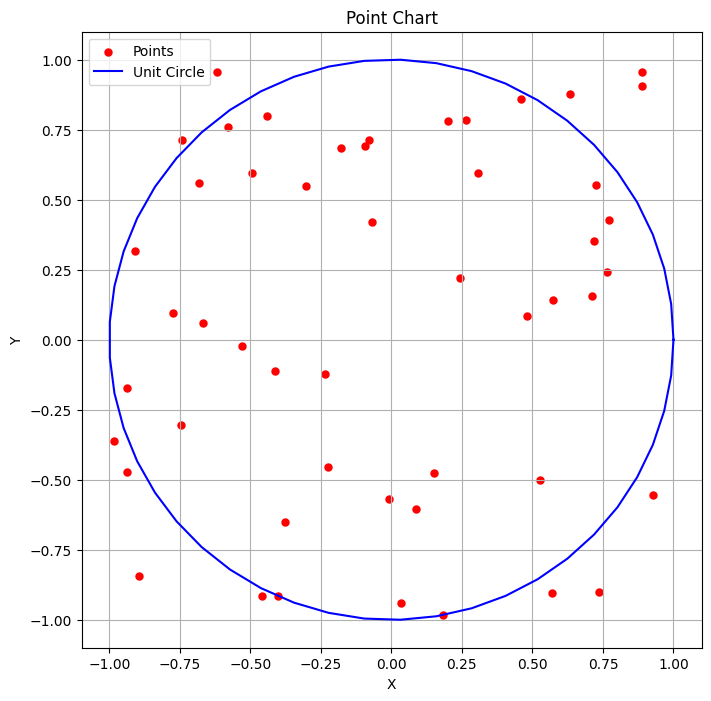

In [3]:
k = 50
square_edge = 2
points =generate_samples(k,square_edge_len= square_edge)

# Plot the points
plt.figure(figsize=(8, 8))
plt.scatter(points[:, 0], points[:, 1], color='red', label='Points',linewidths=0.05)  # Scatter plot of points
plt.title('Point Chart')
plt.xlabel('X')
plt.ylabel('Y')
# plot unit circle
# Generate points along the unit circle
theta = np.linspace(0, 2*np.pi, 50)
x_circle = np.cos(theta)  # Compute x-coordinates
y_circle = np.sin(theta)  # Compute y-coordinates

# Plot the unit circle
plt.plot(x_circle, y_circle, color='blue', linestyle='-', label='Unit Circle')  # Plot the unit circle
# plt.axis('equal')  # Set equal aspect ratio


plt.grid(True)
plt.legend()
plt.show()


##Testing: Single seed precision

In [4]:
def compute_ratio(samples,size):
  # compute how many in root circle
  # Compute the norms of each vector
  norms_array = np.array([np.linalg.norm(sample) for sample in samples])
  # Apply the filter using boolean indexing
  filtered_samples = samples[norms_array <= 1]
  return len(filtered_samples)/size

# -------------------------------------
def estimated_pi(ratio,square_edge_len=2):
  return ratio*(square_edge_len**2)

In [5]:
estimated_pi(compute_ratio(samples= points,size=k))

3.04

#Testing: n over various estimates

In [6]:
def estimate_for_n(n=50,estimates_count = 10):
  estimate = 0
  for i in range(estimates_count):
    points =generate_samples(k=n,square_edge_len=2)
    estimate += estimated_pi(compute_ratio(samples= points,size=n))/estimates_count
  return estimate
# --------------------------------------------
def error_func(x,expected_x):
  return np.abs(expected_x - x)

In [7]:
pi_estimate = estimate_for_n(n =200,estimates_count = 100)
pi_estimate,error_func(x= pi_estimate,expected_x=np.pi)

(3.144400000000001, 0.002807346410207856)

In [8]:
pi_estimate = estimate_for_n(n =1000,estimates_count = 100)
pi_estimate,error_func(x= pi_estimate,expected_x=np.pi)

(3.1456800000000005, 0.00408734641020736)

In [16]:
pi_estimate = estimate_for_n(n =2000,estimates_count = 2000)
pi_estimate,error_func(x= pi_estimate,expected_x=np.pi)

(3.1420179999999984, 0.0004253464102053073)

#Goal 2: to approximate the area of a { Triangle } using the "Monte Carlo" method
## steps:
.1 generate many random points within an origin centered square containing the triangle.

.2 Count how many of said points are within, we just need a way to count.

.3 For large numbers of points, the ratio between the points inside the triangle and the amount of points should approach {triangle_area/square_area}.

.4 extract the triangle area by multiplying the ratio by the area of the square

Measurements:
- compare error to the actual area of the triangle, computed by hand, for different n


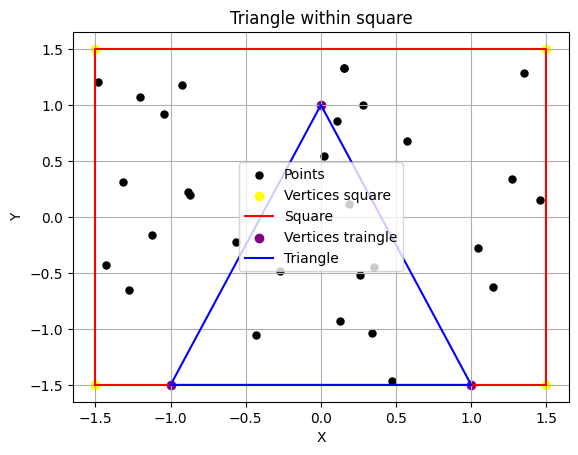

In [12]:
# Example chart
k =30
square_edge = 3
points =generate_samples(k,square_edge_len= square_edge)

# Plot the points
plt.scatter(points[:, 0], points[:, 1], color='black', label='Points',linewidths=0.05)  # Scatter plot of points

# Define the vertices of the square
x_square = [-1.5, -1.5, 1.5, 1.5, -1.5]
y_square = [-1.5, 1.5, 1.5, -1.5, -1.5]

# Plot the vertices
plt.scatter(x_square, y_square, color='yellow', label='Vertices square')

# Connect the vertices to form the square
plt.plot(x_square, y_square, color='red', linestyle='-', label='Square')


# Define the vertices of the triangle
x = [-1, 0, 1]
y = [-1.5, 1, -1.5]

# Plot the vertices
plt.scatter(x, y, color='purple', label='Vertices traingle')

# Connect the vertices to form the triangle
plt.plot([x[0], x[1], x[2], x[0]], [y[0], y[1], y[2], y[0]], color='blue', linestyle='-', label='Triangle')

# Set plot title and labels
plt.title('Triangle within square')
plt.xlabel('X')
plt.ylabel('Y')


# Show legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [13]:
# A way to determine if a point is inside our shape
def is_inside_traingle(triangle, point):
    x, y = point
    x1, x2, x3 = triangle[0]
    y1, y2, y3 = triangle[1]

    # Calculate barycentric coordinates
    denom = (y2 - y3) * (x1 - x3) + (x3 - x2) * (y1 - y3)
    barycentric1 = ((y2 - y3) * (x - x3) + (x3 - x2) * (y - y3)) / denom
    barycentric2 = ((y3 - y1) * (x - x3) + (x1 - x3) * (y - y3)) / denom
    barycentric3 = 1 - barycentric1 - barycentric2

    # Check if barycentric coordinates are within the range [0, 1]
    return (0 <= barycentric1 <= 1) and (0 <= barycentric2 <= 1) and (0 <= barycentric3 <= 1)


# Example usage:
triangle = [[-1, 0, 1],
            [-1.5, 1, -1.5]]
point = (0, 1)
print(is_inside_traingle(triangle, point))


True


In [17]:
# estimation functions for triangle
def compute_ratio_triangle(triangle,samples,size):
  filtered_samples = np.array([sample for sample in samples if is_inside_traingle(triangle, sample)])
  return len(filtered_samples)/size

# -------------------------------------
def estimated_value(ratio,square_edge_len=3):
  return ratio*(square_edge_len**2)
# -------------------------------------
def estimate_triangle_area_for_n(triangle,n=50,estimates_count = 10,square_edge = 3):
  estimate = 0
  for i in range(estimates_count):
    points =generate_samples(k=n,square_edge_len=square_edge)
    estimate += estimated_value(compute_ratio_triangle(triangle =triangle,samples= points,size=n))/estimates_count
  return estimate

In [18]:
triangle = [[-1, 0, 1],
            [-1.5, 1, -1.5]]
actual_area = 2.5

estimate1 = estimate_triangle_area_for_n(triangle = triangle,n=200,estimates_count=200,square_edge = 3)
estimate2 = estimate_triangle_area_for_n(triangle = triangle,n=500,estimates_count=200,square_edge = 3)
estimate3 = estimate_triangle_area_for_n(triangle = triangle,n=200,estimates_count=500,square_edge = 3)
estimate4 = estimate_triangle_area_for_n(triangle = triangle,n=2000,estimates_count=1000,square_edge = 3)
print(f"""Estimate1: {estimate1}
Estimate2: {estimate2}
Estimate3: {estimate3}
Estimate4: {estimate4}""")
print(f"""
Error1: {error_func(x = estimate1,expected_x =actual_area)}
Error2: {error_func(x = estimate2,expected_x =actual_area)}
Error3: {error_func(x = estimate3,expected_x =actual_area)}
Error4: {error_func(x = estimate4,expected_x =actual_area)}""")

Estimate1: 2.4992999999999985
Estimate2: 2.493269999999999
Estimate3: 2.4804900000000036
Estimate4: 2.504168999999994

Error1: 0.0007000000000014772
Error2: 0.006730000000001013
Error3: 0.019509999999996364
Error4: 0.004168999999993872


#Goal 3:
# Approximating the area of a { shape made by UNION of sub-shapes } using the "Monte Carlo" method
## steps:
Input:
-  A shape that is the UNION of other shapes, such each shape given a 2d point can tell if the point is inside it.
steps:

.1 Generate many random points within a BOX (maybe not origin centered) containing the entire shape.
- NOTE: need to find such a box.

.2 Count how many of said points are within, by checking iteratively for sub-shape, with no doubling down on multiple shapes.

.3 For large numbers of points, the ratio between the points inside the and the amount of points should approach {shape_area/box_area}.

.4 Extract the triangle area by multiplying the ratio by the area of the box.

Measurements:
- compare error to the actual area of the shape, computed by hand, for different n


#{- - - - Basic Classes - - - -}

In [33]:
class Box:
    def __init__(self, left_lower_corner,height,width):
        self.origin = left_lower_corner
        self.height = height
        self.width = width
    # -----------------------------------------------------
    def is_point_inside(self,point):
        # A way to determine if a point is inside our shape
        x, y = point

        return (self.origin[0] <= x <= self.origin[0]+ self.width) and (self.origin[1] <= y <= self.origin[1]+ self.height)
# -----------------------------------------------------------------------------------------------
class Triangle:
    def __init__(self, x_cords,y_cords):
        self.x_cords = x_cords
        self.y_cords = y_cords
    # -----------------------------------------------------
    def is_point_inside(self,point):
        # A way to determine if a point is inside our shape
        x, y = point
        x1, x2, x3 = self.x_cords
        y1, y2, y3 = self.y_cords

        # Calculate barycentric coordinates
        denom = (y2 - y3) * (x1 - x3) + (x3 - x2) * (y1 - y3)
        barycentric1 = ((y2 - y3) * (x - x3) + (x3 - x2) * (y - y3)) / denom
        barycentric2 = ((y3 - y1) * (x - x3) + (x1 - x3) * (y - y3)) / denom
        barycentric3 = 1 - barycentric1 - barycentric2

        # Check if barycentric coordinates are within the range [0, 1]
        return (0 <= barycentric1 <= 1) and (0 <= barycentric2 <= 1) and (0 <= barycentric3 <= 1)
# -----------------------------------------------------------------------------------------------
class Circle:
    def __init__(self, origin,radius):
        self.origin = origin
        self.radius = radius
    # -----------------------------------------------------
    def is_point_inside(self,point):
        # A way to determine if a point is inside our shape
        return np.linalg.norm(point - self.origin) <= self.radius
# -----------------------------------------------------------------------------------------------
class Shape_cluster:
    def __init__(self, shape_list):
        self.shape_list = shape_list
    # -----------------------------------------------------
    def is_point_inside(self,point):
        for shape in self.shape_list:
          if(shape.is_point_inside(point)):
            return True
        return False

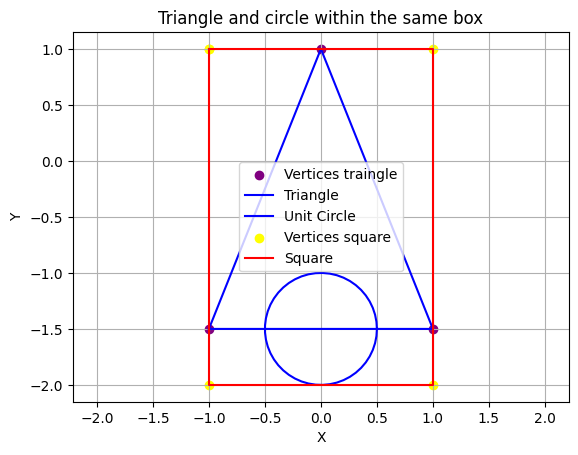

In [45]:
# Example
# Triangle
# --------------------------------------------------
test_tri = Triangle(x_cords=[-1, 0, 1],y_cords=[-1.5, 1, -1.5])
# Define the vertices of the triangle
x = test_tri.x_cords
y = test_tri.y_cords

# Plot the triangle vertices
plt.scatter(x, y, color='purple', label='Vertices traingle')
# Connect the vertices to form the triangle
plt.plot([x[0], x[1], x[2], x[0]], [y[0], y[1], y[2], y[0]], color='blue', linestyle='-', label='Triangle')
# --------------------------------------------------
# Circle
# --------------------------------------------------
test_circle = Circle(origin = [0,-1.5],radius= 0.5)
# plot Cricle
theta = np.linspace(0, 2*np.pi, 50)
x_circle = test_circle.radius*np.cos(theta) + test_circle.origin[0]  # Compute x-coordinates
y_circle = test_circle.radius*np.sin(theta) + test_circle.origin[1] # Compute y-coordinates

# Plot the unit circle
plt.plot(x_circle, y_circle, color='blue', linestyle='-', label='Unit Circle')  # Plot the unit circle
# --------------------------------------------------
# Containing box
# --------------------------------------------------
test_box = Box(left_lower_corner= [-1,-2],height = 3,width=2)
# Define the vertices of the box
x_box = [-1, -1, 1, 1, -1]
y_box = [1, -2, -2, 1, 1]

# Plot the vertices
plt.scatter(x_box, y_box, color='yellow', label='Vertices square')

# Connect the vertices to form the box
plt.plot(x_box, y_box, color='red', linestyle='-', label='Square')
# --------------------------------------------------
# Set plot title and labels
plt.title('Triangle and circle within the same box')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.legend()
# Show the plot
plt.grid(True)
plt.show()

In [46]:
# Params
shape = Shape_cluster([test_circle,test_tri])
box_area = 6
expected_area = 2.5 + 0.5*np.pi *(0.5**2)
expected_area

2.892699081698724

In [47]:
# estimation functions for this shape
def generate_samples_in_box(k,box):
    x_min, y_min = box.origin
    x_max = x_min + box.width
    y_max = y_min + box.height

    # Generate random x and y coordinates inside the box
    rand_x = np.random.uniform(x_min, x_max, size=k)
    rand_y = np.random.uniform(y_min, y_max, size=k)

    # Combine x and y coordinates to form 2d points
    points = np.column_stack((rand_x, rand_y))

    return points
# -------------------------------------
def compute_point_ratio(shape,samples,size):
  counter = 0
  for sample in samples:
    if(shape.is_point_inside(sample)):
      counter +=1
  return counter/size

# -------------------------------------
def estimate_shape_area_for_n(shape ,box,n=50,estimates_count = 10):
  estimated_ratio = 0
  for i in range(estimates_count):
    points =generate_samples_in_box(k=n,box = box)
    estimated_ratio += compute_point_ratio(shape =shape,samples= points,size=n)/estimates_count
  return estimated_ratio * box.width * box.height #box area times ratio

In [49]:
estimate_shape_area_for_n(shape = shape, box =test_box ,n = 2000,estimates_count= 200)

2.8958550000000005